In [2]:
from time import time
import matplotlib.pyplot as plt
import tensorflow as tf


In [3]:
mnist = tf.keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

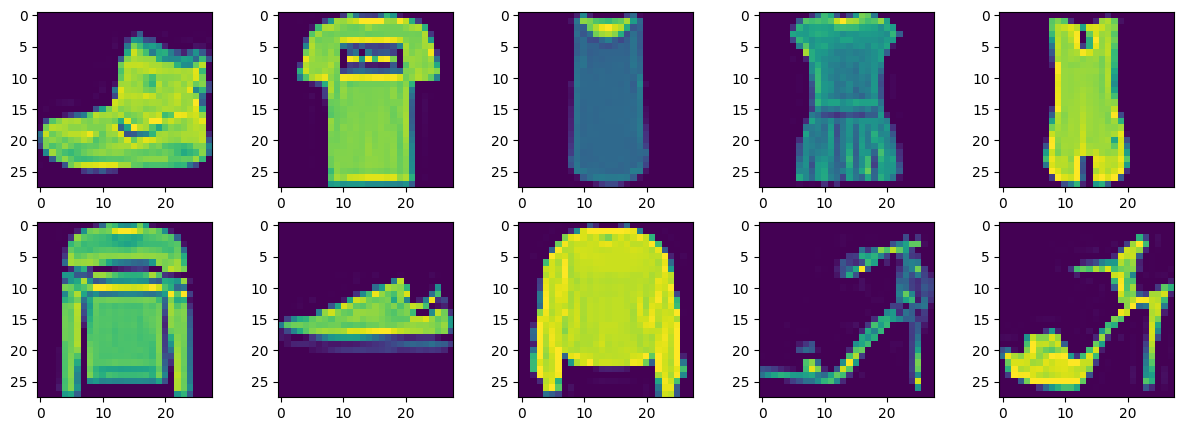

In [4]:
fig,axis = plt.subplots(nrows = 2,ncols = 5 , figsize = (15,5))
ax = axis.ravel()

for i in range(10):
    ax[i].imshow(X_train[i].reshape((28,28)))
plt.show()

In [5]:
training_images = X_train/255.0
test_images = X_test/255.0


In [6]:
# Keras Model Oluşturalım...

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation = tf.nn.relu),
    tf.keras.layers.Dense(10,activation = tf.nn.softmax)
])

# Model Oluşturmanın diğer Türü

# from keras.models import Sequential
# from keras.layers import Dense,Flatten

# model = Sequential()
# model.add(Flatten())
# model.add(Dense(256,activation = "relu"))
# model.add(Dense(10,activation="softmax"))





In [7]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


In [8]:
t1 = time()
model.fit(training_images,y_train,epochs=10)
t2 = time()

Epoch 1/10


1875/1875 [==============================] - 5s 2ms/step - loss: 0.4843 - accuracy: 0.8281
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3630 - accuracy: 0.8681
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3292 - accuracy: 0.8789
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3031 - accuracy: 0.8872
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2848 - accuracy: 0.8945
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2692 - accuracy: 0.8997
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2556 - accuracy: 0.9037
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2452 - accuracy: 0.9069
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2345 - accuracy: 0.9121
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2264 - accurac

In [9]:
print("\nEğitimin Tamamlanma Saati:{} seconds\n".format(round(t2-t1,3)))


Eğitimin Tamamlanma Saati:37.849 seconds



In [10]:
test_loss = model.evaluate(test_images,y_test)
print("\nTest Accuracy: ",test_loss[1])

313/313 [==============================] - 1s 1ms/step - loss: 0.3248 - accuracy: 0.8889

Test Accuracy:  0.8888999819755554


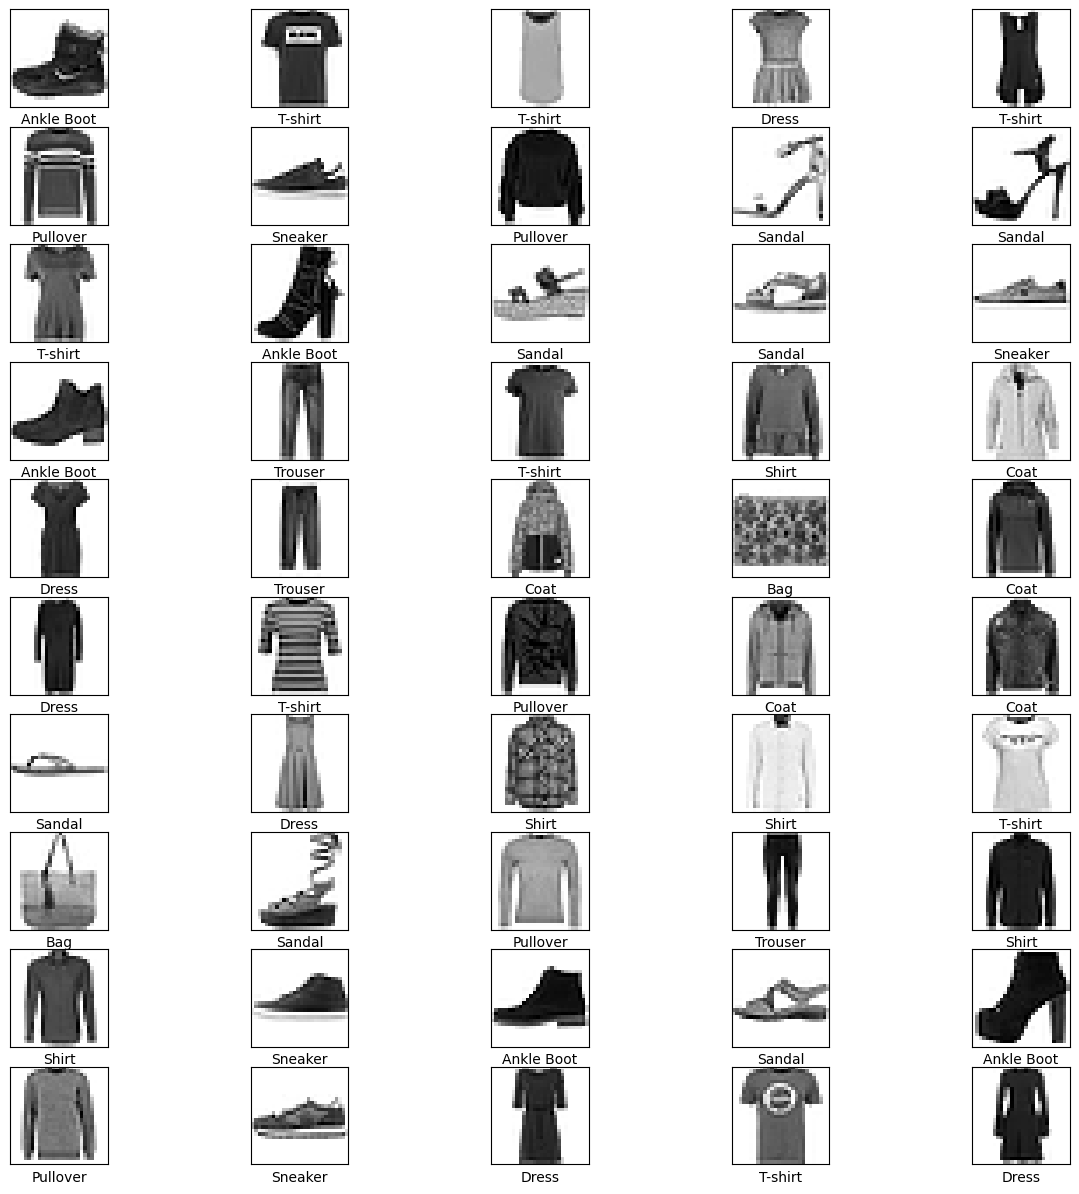



[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [14]:
# MODELE CONVOLUTİON VE POOLİNG LAYERS EKLEYELİM FARKI GÖRELİM!!

(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train = X_train.reshape(60000,28,28,1)
X_train = X_train / 255.0

X_test = X_test.reshape(10000,28,28,1)
X_test = X_test / 255.0

class_names = ["T-shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

plt.figure(figsize=(15,15))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid = False
    plt.imshow(X_train[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

plt.show()

print("\n")


from keras.utils.np_utils import to_categorical as tc
# ONE-HOT ENCODER KULLANDIK
y_train_ct = tc(y_train,10)
y_test_ct = tc(y_test,10)

for i in range(10):
    print(y_train_ct[i])

print("\n")

for i in range(10):
    print(y_test_ct[i])  

In [16]:
from keras.models import Sequential
from keras.layers import Dense,MaxPool2D,Conv2D,Flatten,Dropout , BatchNormalization

model2 = Sequential()
model2.add(Conv2D(filters=64,kernel_size = (4,4),activation = "relu",input_shape = (28,28,1)))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(BatchNormalization())
model2.add(Dropout(0.02))
model2.add(Conv2D(filters=64 , kernel_size=(4,4),activation="relu"))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(BatchNormalization())
model2.add(Dropout(0.02))
model2.add(Flatten())
model2.add(Dense(128,activation="relu"))
model2.add(Dense(10,activation="softmax"))

In [17]:
model2.compile(loss = "categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 64)        1088      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 12, 12, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          65600     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)        

In [18]:
t1 = time()
history = model2.fit(X_train , y_train_ct ,epochs=10)
t2 = time()

Epoch 1/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.3977 - accuracy: 0.8551
Epoch 2/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2823 - accuracy: 0.8959
Epoch 3/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2437 - accuracy: 0.9079
Epoch 4/10
1875/1875 [==============================] - 53s 29ms/step - loss: 0.2136 - accuracy: 0.9182
Epoch 5/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1856 - accuracy: 0.9294
Epoch 6/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1634 - accuracy: 0.9377
Epoch 7/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1434 - accuracy: 0.9464
Epoch 8/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1280 - accuracy: 0.9514
Epoch 9/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.1136 - accuracy: 0.9577
Epoch 10/10
1875/1875 [==============================] - 50s 27m

In [19]:
print("\nEğitimi Tamamlama Süresi: {:.2f} dakika".format((t2 - t1) / 60))



Eğitimi Tamamlama Süresi: 8.61 dakika


  1/313 [..............................] - ETA: 6s

313/313 [==============================] - 2s 6ms/step


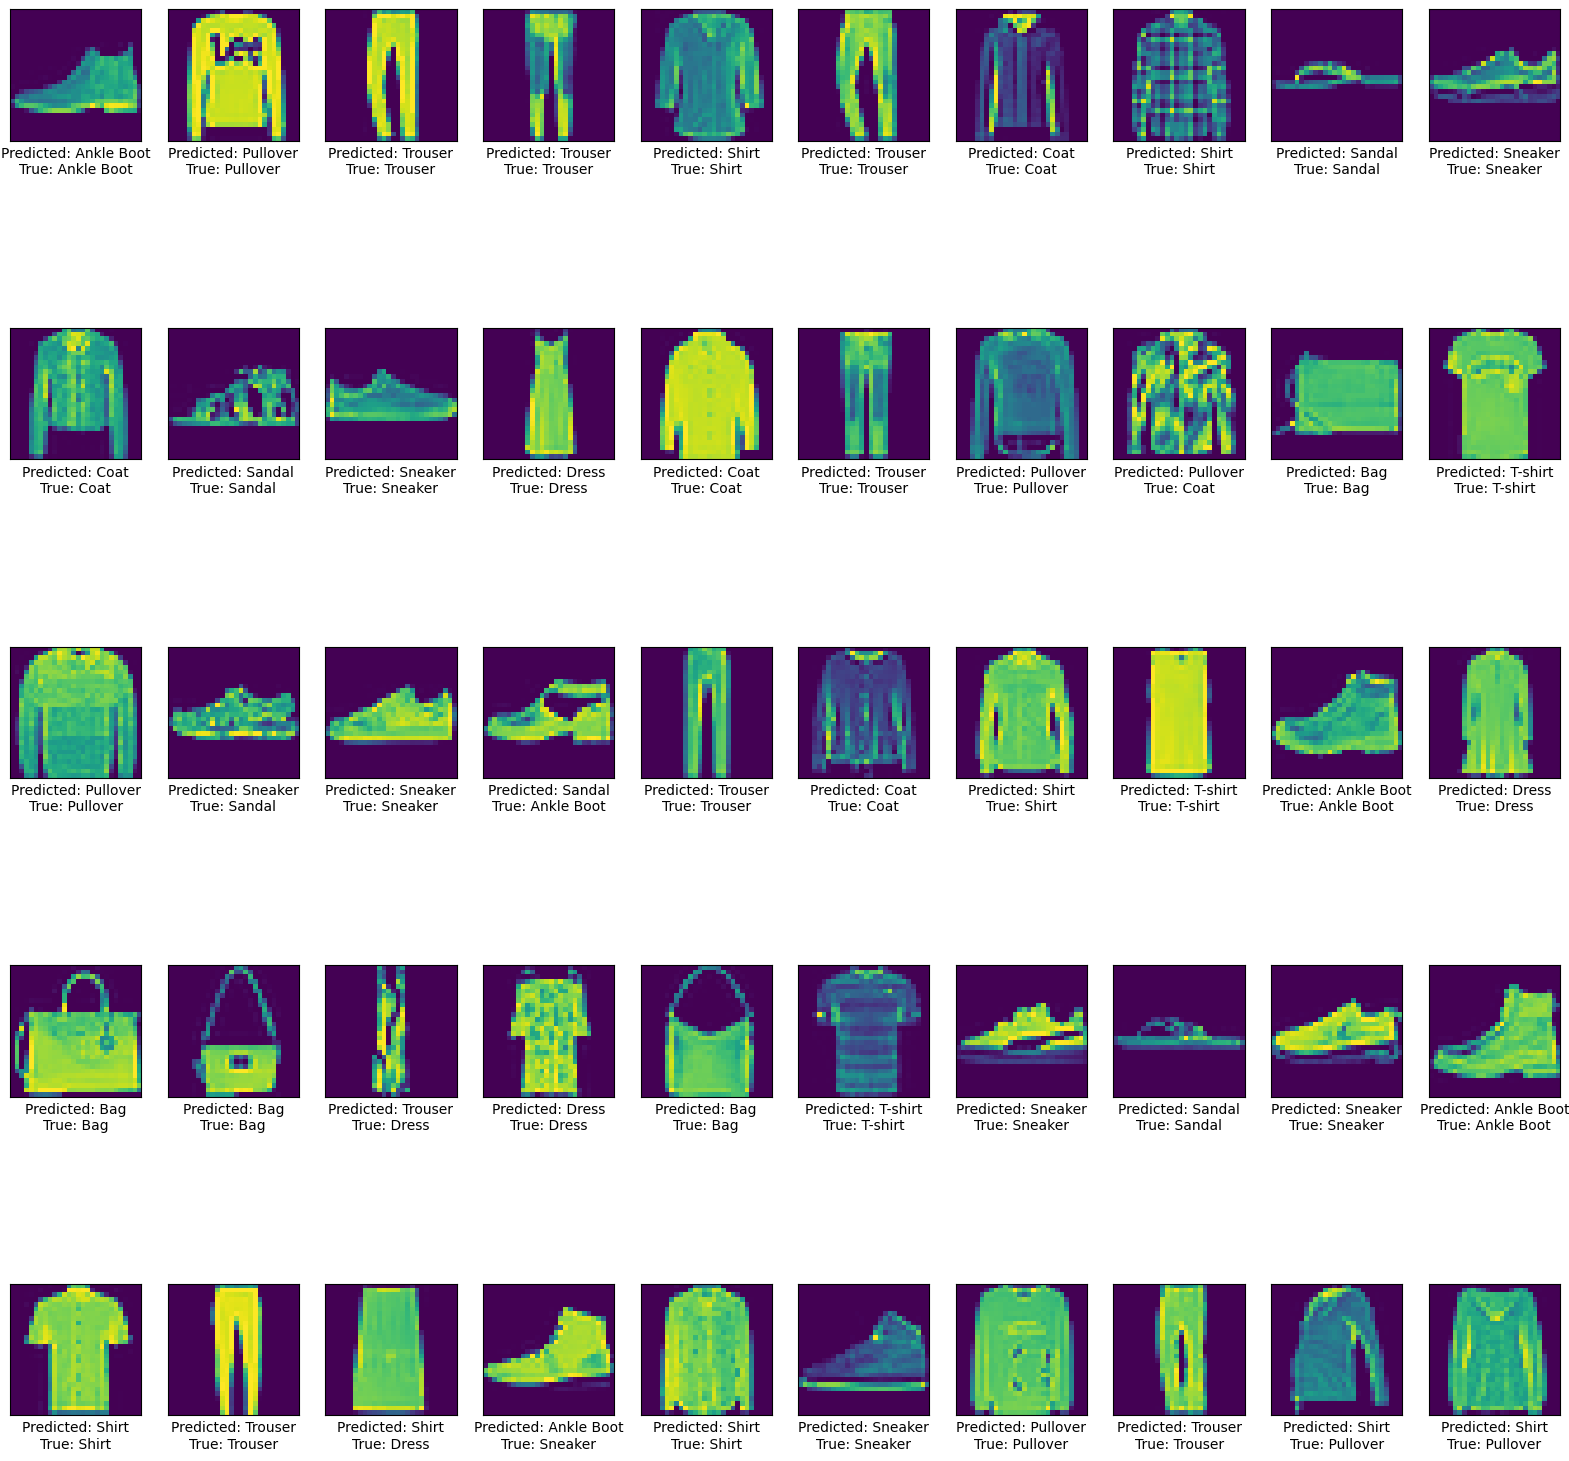

In [22]:
predictions = model2.predict(X_test)
predicted_labels = [class_names[p.argmax()] for p in predictions]
true_labels = [class_names[t] for t in y_test]

# Tahminleri ve gerçek etiketleri karşılaştırın
plt.figure(figsize=(20, 20))
for i in range(50):
    plt.subplot(5, 10, i + 1)
    plt.imshow(X_test[i].reshape(28,28))
    # Aşağıdaki kod satırı görüntüyü siyah beyaz yapar.
    # plt.imshow(X_test[i].reshape(28, 28),cmap = plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.grid = False
    plt.xlabel(f'Predicted: {predicted_labels[i]}\nTrue: {true_labels[i]}')
plt.show()